In [85]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import glob
import math
%matplotlib inline

#cv
import cv2
import math
from PIL import Image
import math
from scipy import ndimage
import argparse
import imutils


#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from matplotlib import font_manager, rc
rc('font',family="AppleGothic")
plt.rcParams["font.family"]="AppleGothic" #plt 한글꺠짐
plt.rcParams["font.family"]="Arial" #외국어꺠짐
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.rc('figure', figsize=(10,8))

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid') #sns 한글깨짐

In [86]:
def show(img):
    #사이즈
    plt.figure(figsize = (10,8))
    #xticks/yticks - 눈금표
    plt.xticks([])
    plt.yticks([])
    #코랩에서 안돌아감 주의
    plt.imshow(img, cmap= 'gray')
    plt.show()

In [ ]:
def img_get(path):
    img = im

In [87]:
def show_img(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    show(img)

In [100]:
def img_get(path):
    data_path = os.path.join(path,'*g')
    files= glob.glob(data_path)
    img_list =[]
    for i in pinky_list:
        img = cv2.imread(i)
        img_list.append(img)
        
    return img_list

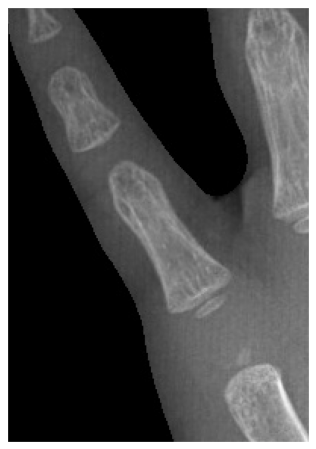

In [103]:
img = img_get(pinky_path)[1]
show(img)

In [88]:
#이미지 불러오기
def get_img(path):
    data_path = os.path.join(path, '*g')
    files= glob.glob(data_path)
    img_list=[]
    for f1 in files:
        img = cv2.imread(f1)
        img_list.append(img)
#     print('이미지수',len(img_list))
#     print('show(get_img(list_file[1])[0]) 식으로 이미지 불러와서 img로 저장')
    
    return img_list
    
# data_img = get_img(list_file[2])
# show(img_list[1])

### path

In [89]:
extract_path = "/Users/monica/Documents/프로젝트/Bone Age/초명/1차 데이터/"

In [90]:
file_list = os.listdir(extract_path)
file_list.sort()
file_list = file_list[1:]
list_file = []
for i in file_list:
    list_file.append(extract_path+i+"/")
list_file.sort()
list_file

['/Users/monica/Documents/프로젝트/Bone Age/초명/1차 데이터/data/',
 '/Users/monica/Documents/프로젝트/Bone Age/초명/1차 데이터/middle/',
 '/Users/monica/Documents/프로젝트/Bone Age/초명/1차 데이터/pinky/',
 '/Users/monica/Documents/프로젝트/Bone Age/초명/1차 데이터/thumbs/',
 '/Users/monica/Documents/프로젝트/Bone Age/초명/1차 데이터/wrist/']

In [105]:
pinky_path = list_file[2]
file_list = os.listdir(pinky_path)
file_list.sort()
file_list = file_list[1:]
pinky_list = []
for i in file_list:
    pinky_list.append(pinky_path+i)
pinky_list.sort()
pinky_list[:3]

['/Users/monica/Documents/프로젝트/Bone Age/초명/1차 데이터/pinky/002_M_p.jpg',
 '/Users/monica/Documents/프로젝트/Bone Age/초명/1차 데이터/pinky/003_M_p.jpg',
 '/Users/monica/Documents/프로젝트/Bone Age/초명/1차 데이터/pinky/004_M_p.jpg']

### Data

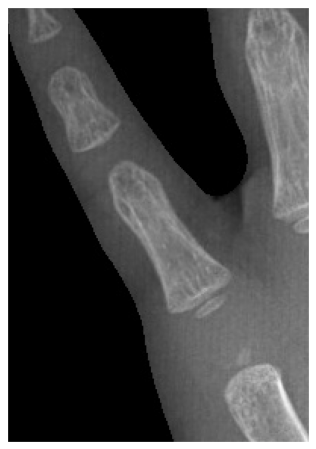

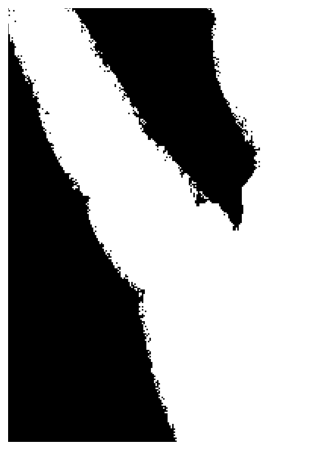

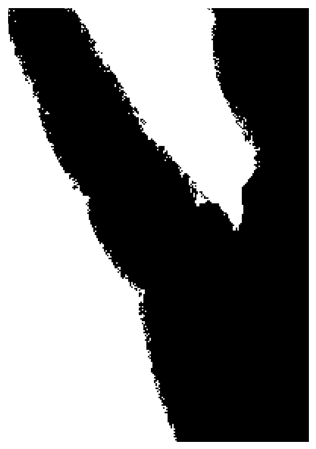

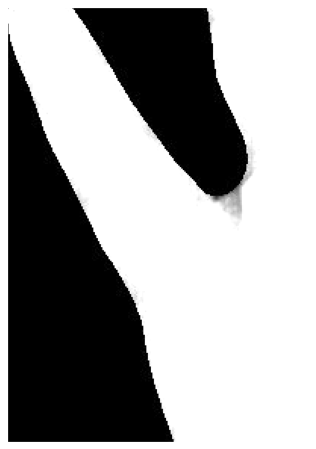

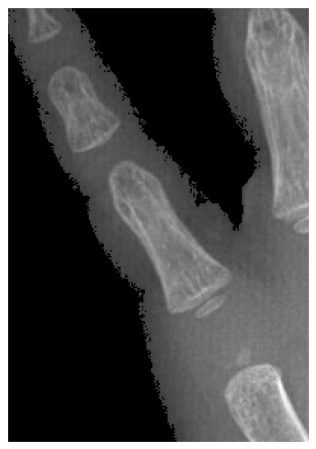

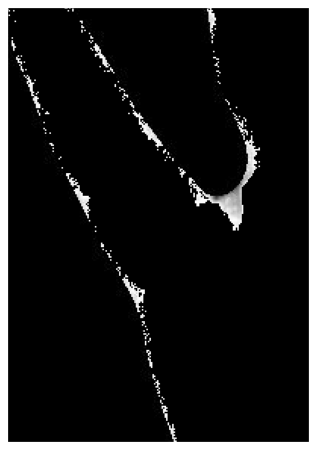

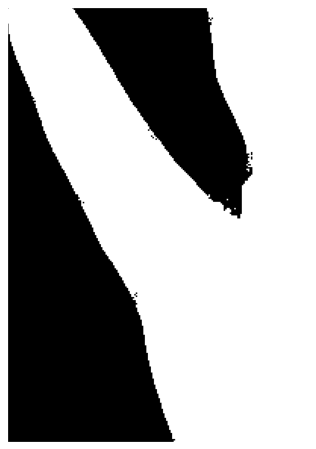

In [108]:
img = img_get(pinky_path)[1]
show(img)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thr = cv2.threshold(img_gray,img_gray.mean(),255,cv2.THRESH_BINARY)
ret2, thr2 = cv2.threshold(img_gray,img_gray.mean(),255,cv2.THRESH_BINARY_INV)
ret3, thr3 = cv2.threshold(img_gray,img_gray.mean(),255,cv2.THRESH_TRUNC) # 픽셀값이 임계값 보다 크면 임계값, 작으면 픽셀값 그대로
ret4, thr4 = cv2.threshold(img_gray,img_gray.mean(),255,cv2.THRESH_TOZERO) # 픽셀값이 임계값 보다 크면 픽셀 값 그대로, 작으면 0
ret5, thr5 = cv2.threshold(img_gray,img_gray.mean(),255,cv2.THRESH_TOZERO_INV) # 픽셀값이 임계값 보다 크면 0, 작으면 픽셀값 그대로
ret6, thr6 = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

show(thr)
show(thr2)
show(thr3)
show(thr4)
show(thr5)
show(thr6)

In [243]:
def binarization(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thr = cv2.threshold(img_gray,img_gray.mean(),255,cv2.THRESH_TOZERO)
    img_hist = cv2.equalizeHist(thr)
    ret1, thr1 = cv2.threshold(img_hist,thr.mean(),255,cv2.THRESH_TOZERO)
    clahe = cv2.createCLAHE(clipLimit=img_gray.mean(), tileGridSize=(1,1))
    clahe_img = clahe.apply(img_bir)
    return clahe_img

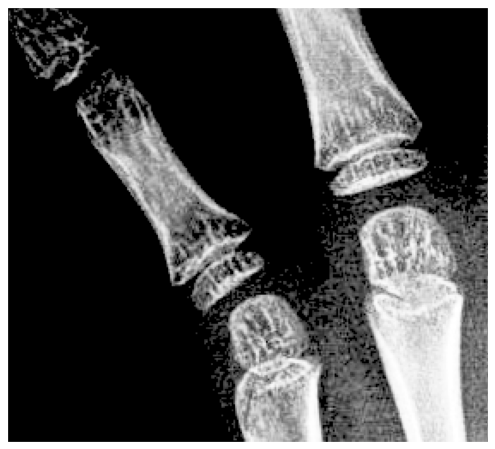

In [244]:
img = img_get(pinky_path)[199]
ret = binarization(img)
show(ret)

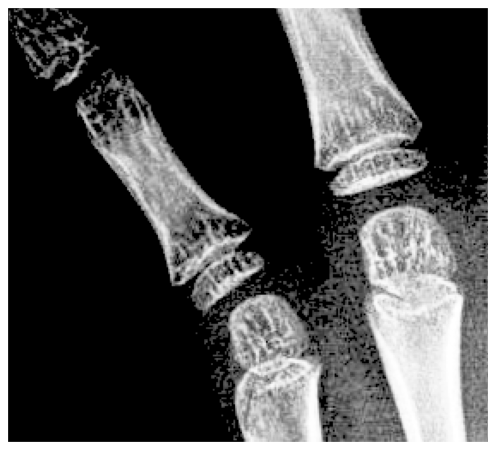

In [235]:
img = img_get(pinky_path)[199]
ret = binarization(img)
show(ret)

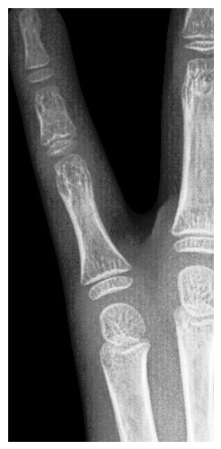

In [186]:
img = img_get(pinky_path)[199]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=10, tileGridSize=(1,1))
cl1 = clahe.apply(gray)
show(cl1)

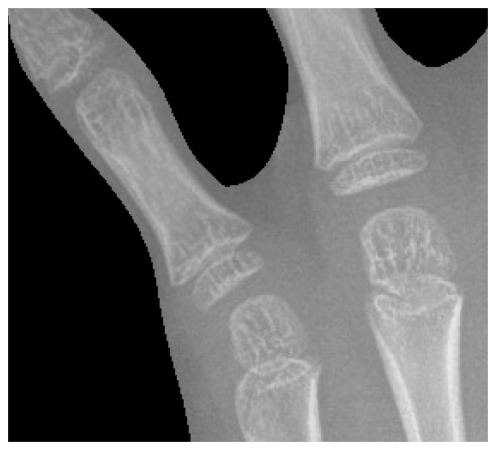

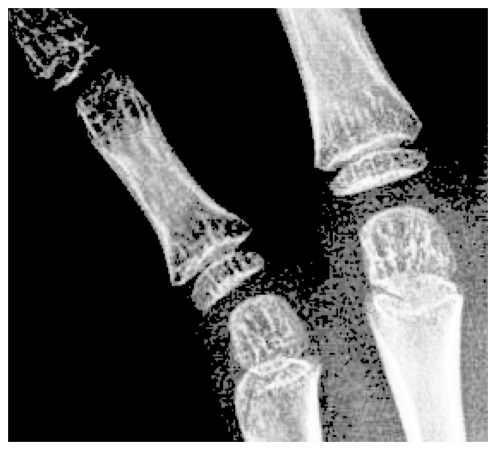

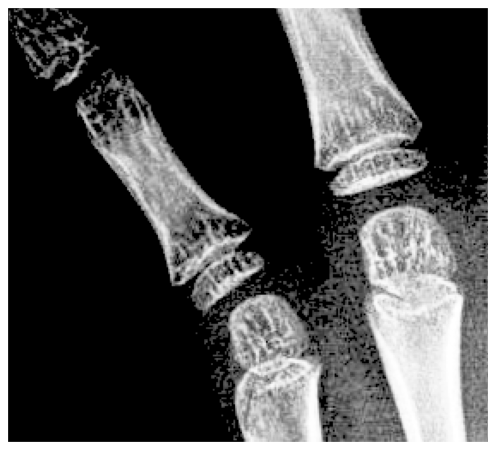

In [233]:
img = img_get(pinky_path)[300]
show(img)
img_bir= binarization(img)
show(img_bir)
clahe_img = clahe.apply(img_bir)
show(clahe_img)

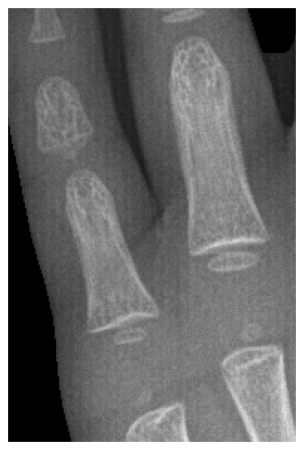

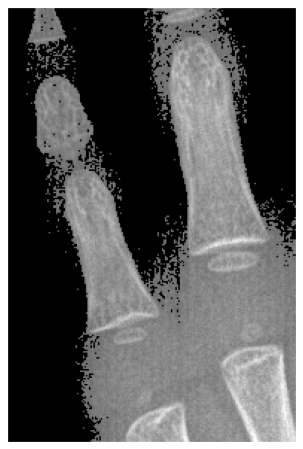

In [112]:
img = img_get(pinky_path)[10]
show(img)
# img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
# show(img_lab)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thr = cv2.threshold(img_gray,img_gray.mean(),255,cv2.THRESH_BINARY)
ret2, thr2 = cv2.threshold(img_gray,img_gray.mean(),255,cv2.THRESH_BINARY_INV)
ret3, thr3 = cv2.threshold(img_gray,img_gray.mean(),255,cv2.THRESH_TRUNC) # 픽셀값이 임계값 보다 크면 임계값, 작으면 픽셀값 그대로
ret4, thr4 = cv2.threshold(img_gray,img_gray.mean(),255,cv2.THRESH_TOZERO) # 픽셀값이 임계값 보다 크면 픽셀 값 그대로, 작으면 0
ret5, thr5 = cv2.threshold(img_gray,img_gray.mean(),255,cv2.THRESH_TOZERO_INV) # 픽셀값이 임계값 보다 크면 0, 작으면 픽셀값 그대로
ret6, thr6 = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# show(thr)
# show(thr2)
# show(thr3)
show(thr4)
# show(thr5)
# show(thr6)

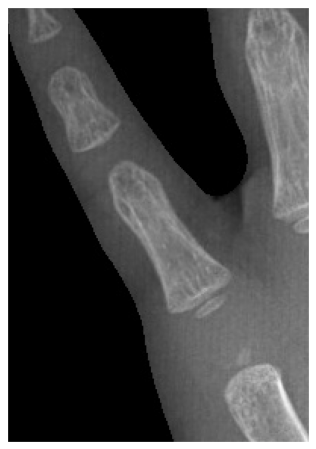

60.14548611111111


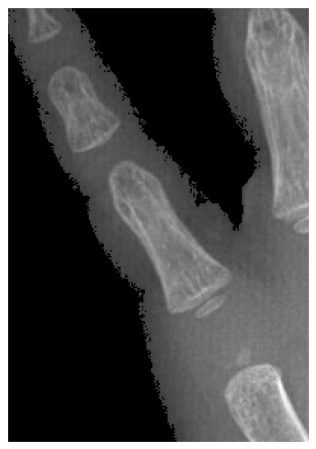

(array([[279.,   0.,   9., ...,   0.,   0.,   0.],
        [272.,   0.,  16., ...,   0.,   0.,   0.],
        [265.,   0.,  23., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   4.,   1.,   3.],
        [  0.,   0.,   0., ...,   2.,   2.,   1.],
        [  0.,   0.,   0., ...,   4.,   0.,   0.]]),
 array([  0. ,  25.1,  50.2,  75.3, 100.4, 125.5, 150.6, 175.7, 200.8,
        225.9, 251. ]),
 <a list of 200 BarContainer objects>)

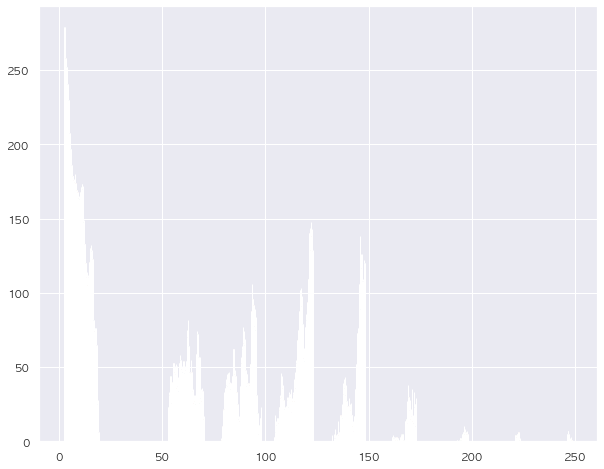

In [130]:
img = img_get(pinky_path)[1]
show(img)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret4, thr4 = cv2.threshold(img_gray,img_gray.mean(),255,cv2.THRESH_TOZERO)
print(img_gray.mean())
show(thr4)

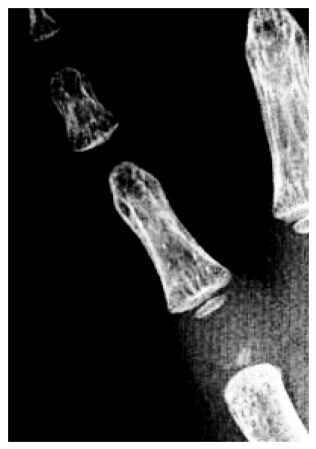

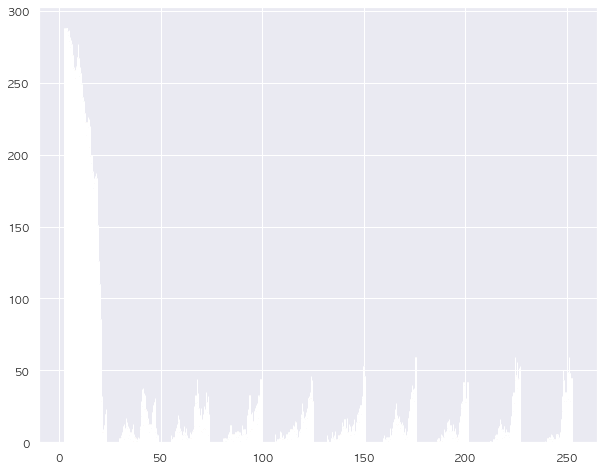

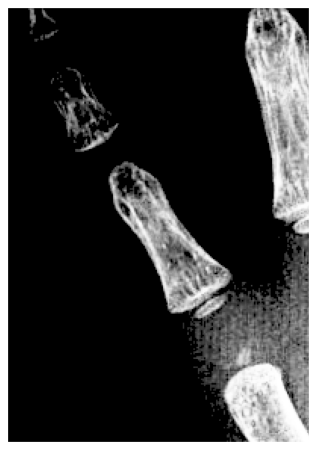

In [139]:
img_hist = cv2.equalizeHist(thr4)
show(img_hist)
plt.hist(img_hist)

hist_test = img_hist.copy()

# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thr = cv2.threshold(hist_test,hist_test.mean(),255,cv2.THRESH_BINARY)
ret2, thr2 = cv2.threshold(hist_test,hist_test.mean(),255,cv2.THRESH_BINARY_INV)
ret3, thr3 = cv2.threshold(hist_test,hist_test.mean(),255,cv2.THRESH_TRUNC) # 픽셀값이 임계값 보다 크면 임계값, 작으면 픽셀값 그대로
ret4, thr4 = cv2.threshold(hist_test,hist_test.mean(),255,cv2.THRESH_TOZERO) # 픽셀값이 임계값 보다 크면 픽셀 값 그대로, 작으면 0
ret5, thr5 = cv2.threshold(hist_test,hist_test.mean(),255,cv2.THRESH_TOZERO_INV) # 픽셀값이 임계값 보다 크면 0, 작으면 픽셀값 그대로
ret6, thr6 = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# show(thr)
# show(thr2)
# show(thr3)
show(thr4)
# show(thr5)
# show(thr6)

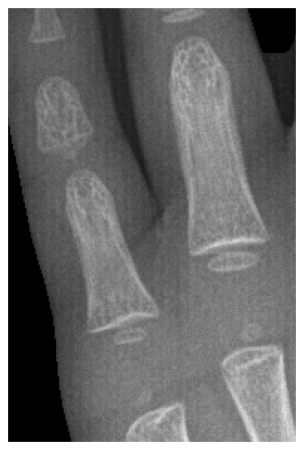

97.08665795791555


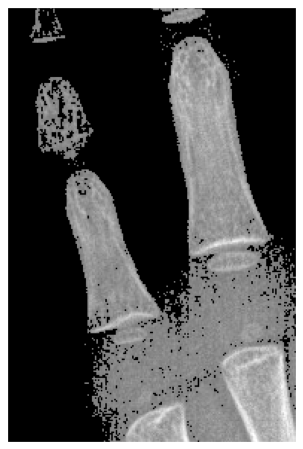

In [126]:
img = img_get(pinky_path)[10]
show(img)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret4, thr4 = cv2.threshold(img_gray,img_gray.mean()+(img_gray.mean()*0.15),255,cv2.THRESH_TOZERO)
print(img_gray.mean())
show(thr4)
# img_BGR = cv2.cvtColor(thr4, cv2.COLOR_GRAY2BGR)
# img_lab = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2Lab)
# img_gray2 = cv2.cvtColor(img_lab, cv2.COLOR_BGR2GRAY)
# show(img_gray2)
# # show(img_lab)
# ret4, thr4 = cv2.threshold(img_gray2,img_gray.mean(),255,cv2.THRESH_TOZERO)
# show(thr4)

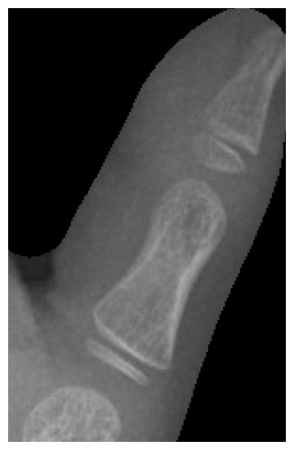

In [8]:
img_test ="/Users/monica/Documents/프로젝트/Bone Age/초명/1차 데이터/thumbs/1_F_t.jpg"
img = cv2.imread(img_test, cv2.IMREAD_COLOR)
show(img)

### OTSU

<class 'list'>


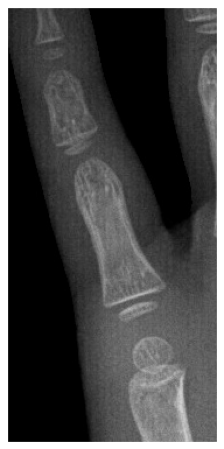

In [37]:
pinky_img_list = get_img(pinky_path)
print(type(pinky_img_list))
show(pinky_img_list[1])

(373, 180, 3)


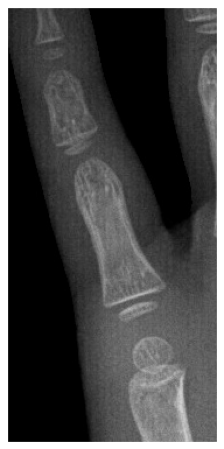

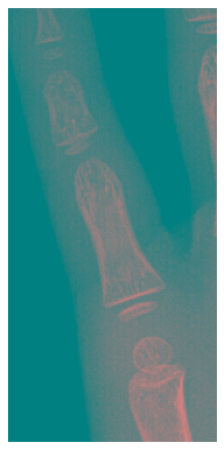

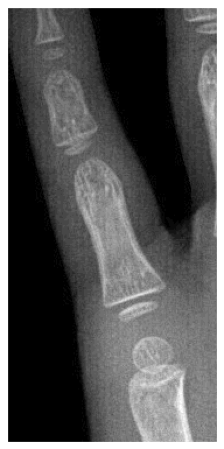

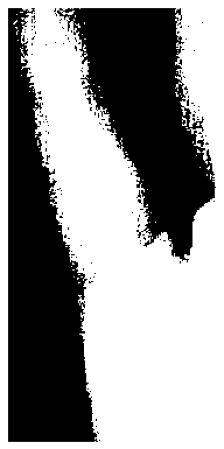

In [49]:
img = pinky_img_list[1]
print(img.shape)
show(img)
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
show(img_lab)
# img = pinky_img_list[1]
img_gray = cv2.cvtColor(img_lab, cv2.COLOR_BGR2GRAY)
show(img_gray)
ret, thr_otsu = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show(thr_otsu)

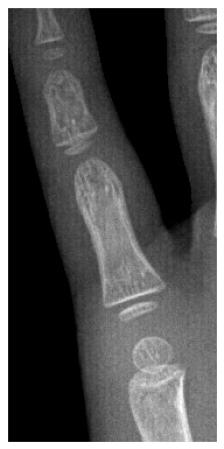

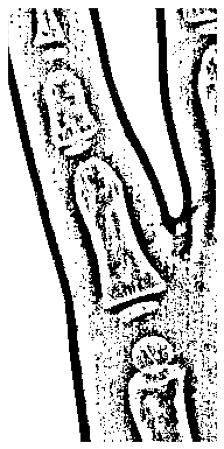

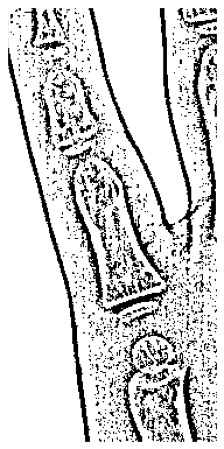

In [80]:
img = pinky_img_list[1]
# img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
# show(img_lab)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(img_gray)
ret,img_result1 = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY)
# show(img_result1)
img_result2 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 5)
show(img_result2)
img_result3 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 5)
show(img_result3)

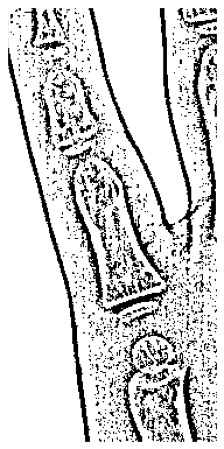

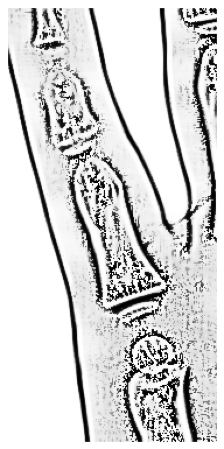

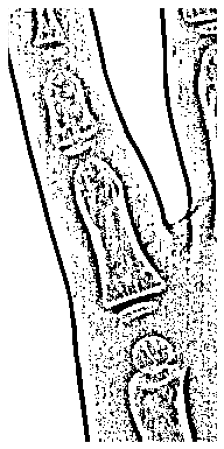

In [83]:
img_test = img_result3.copy()
show(img_test)
denoised_img = cv2.fastNlMeansDenoising(img_test, h=60, templateWindowSize = 10, searchWindowSize = 21 )
show(denoised_img)

img_result4 = cv2.adaptiveThreshold(denoised_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 5)
show(img_result4)

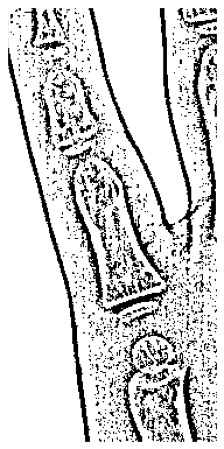

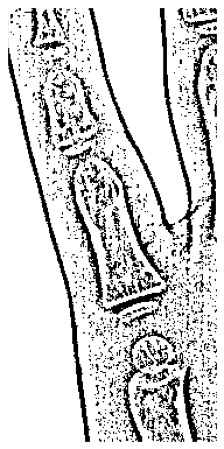

In [75]:
show(img_result3)
img_test = img_result3.copy()
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(img_test, None, None, None, 8, cv2.CV_32S)

areas = stats[1:,cv2.CC_STAT_AREA]

result_cc = np.zeros((labels.shape), np.uint8)

for i in range(0, nlabels - 1):
    if areas[i] >= 0:   #keep
        result_cc[labels == i + 1] = 255

show(result_cc)

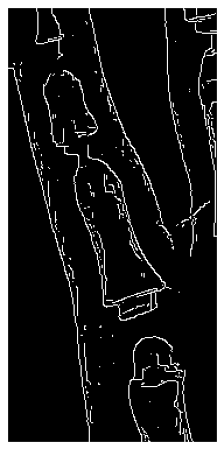

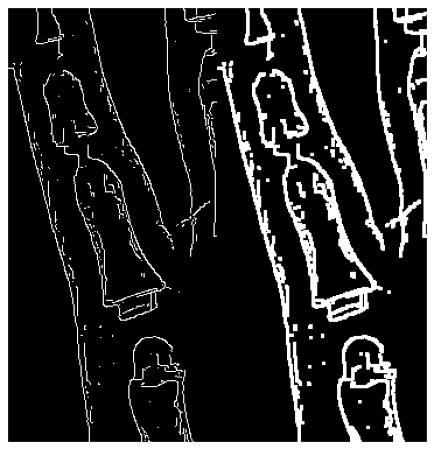

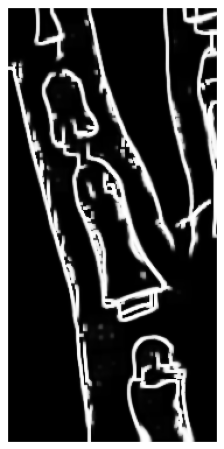

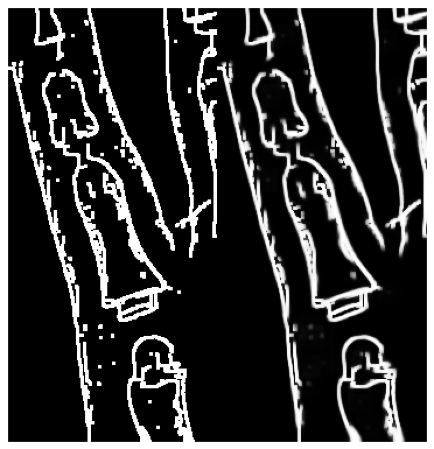

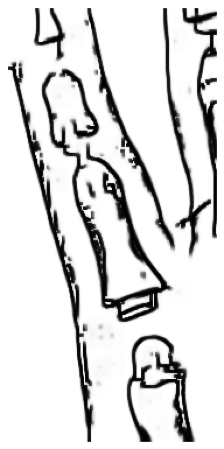

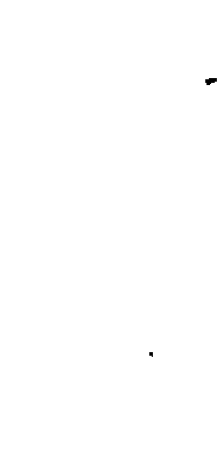

In [73]:
img = pinky_img_list[1]
kernel2 = np.ones((11, 11), np.uint8)
result2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel2)
canny_test = cv2.Canny(result2, 50,53, 100,3)
show(canny_test)

k = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
dst = cv2.dilate(canny_test, k)
thick_line = dst.copy()

#합쳐서 보기
merged = np.hstack((canny_test, thick_line))
show(merged)

#denoising
denoised_img = cv2.fastNlMeansDenoising(thick_line, h=60, templateWindowSize = 10, searchWindowSize = 21 )
show(denoised_img)
no_noise = denoised_img.copy()
merged = np.hstack((thick_line, no_noise))
show(merged)

bw_img = cv2.bitwise_not(no_noise)
show(bw_img)

im = cv2.normalize(bw_img, None, alpha=0, beta= 255, norm_type = cv2.NORM_MINMAX)
res, im = cv2.threshold(im, 220, 255,cv2.THRESH_BINARY) #흰색이니

cv2.floodFill(im, None, (0,0), 0)
cv2.floodFill(im, None, (0,0), 255)

#이미지저장  (from PIL import Image)
Image.fromarray(im)
no_boder = im.copy()
show(no_boder)

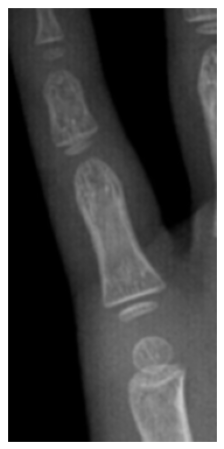

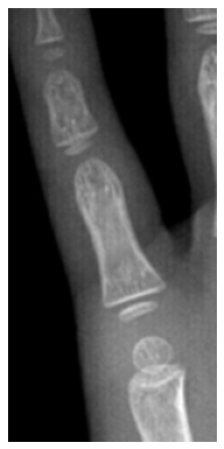

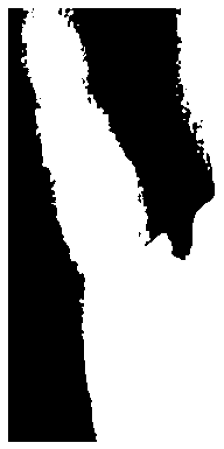

In [65]:
img = pinky_img_list[1]
img_blur = cv2.GaussianBlur(img,(5,5),0)
show(img_blur)
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
show(img_gray)
ret, img_result4 = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show(img_result4)